**Author**: Luca Giaccone (luca.giaccone@polito.it)


# Esempio di computational notebook (4)
Troviamo la soluzione del problema non-lineare

$$x^2 = 5$$

applicando il metodo delle tangenti.

Trasformiamo il problema in:

$$f(x) = x^2 - 5 = 0$$

Applichiamo lo schema rosolutivo:

$$x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}$$

dove, nel nostro caso:
* $f(x) = x^2 - 5$
* $f'(x) = 2x$



## Visualizziamo il problema graficamente

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from matplotlib.ticker import FormatStrFormatter

In [2]:
# funzione f
f = lambda x: x**2 - 5

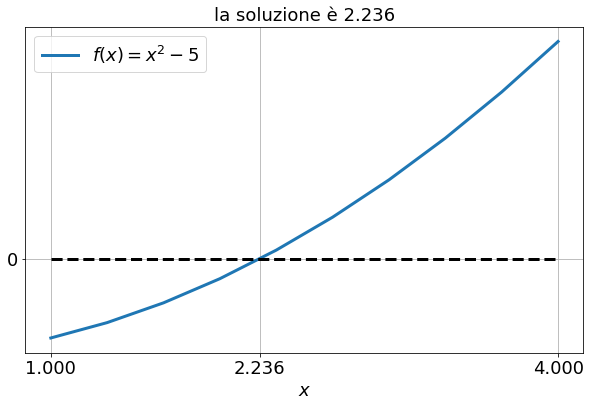

In [3]:
# static plot
x = np.linspace(1, 4, 10)
plt.figure(figsize=(10,6))
plt.plot(x, f(x), linewidth=3, label="$f(x) = x^2 - 5$")
plt.plot(x, np.zeros_like(x), 'k--', linewidth=3)
plt.grid()
plt.xticks([1, np.sqrt(5), 4], fontsize=18)
plt.yticks([0], fontsize=18)
plt.xlabel('$x$', fontsize=18)
plt.legend(fontsize=18)
plt.title("la soluzione è {:.3f}".format(np.sqrt(5)),fontsize=18);

## Implementiamo il metodo delle tangenti

In [4]:
# funzione f'
fprime = lambda x: 2*x

# step che dato x_k in input, fornisce x_k+1 in output
def next(x):
  return x - (f(x) / fprime(x))

# funzione che calcola la tangente in xk
def tangent(x, xk):
  return f(xk) + fprime(xk) * (x - xk)

## Visualizzazione in forma numerica

In [5]:
# Valore iniziale e numero di iterazioni
x0 = 0.5
iter_num = 7

x = [x0]
print("       x0 = {:.3f}".format(x[-1]))
for k in range(iter_num):
  x.append(next(x[-1]))
  delta = abs((x[-1] - x[-2]) / x[-2]) * 100
  print("x{} --> x{} = {:.3f}   variazione {:.2f} %".format(k, k+1, x[-1], delta))

       x0 = 0.500
x0 --> x1 = 5.250   variazione 950.00 %
x1 --> x2 = 3.101   variazione 40.93 %
x2 --> x3 = 2.357   variazione 24.01 %
x3 --> x4 = 2.239   variazione 4.99 %
x4 --> x5 = 2.236   variazione 0.14 %
x5 --> x6 = 2.236   variazione 0.00 %
x6 --> x7 = 2.236   variazione 0.00 %


## Visualizzazione in forma grafica

In [6]:
# Valore iniziale e numero di iterazioni
x0 = 0.5
iter_num = 3

def fun(iter_num):
  xnew = x0
  for k in range(iter_num):
    xold = xnew
    xnew = next(xnew)
    
  x = np.linspace(0, 6, 10)
  plt.figure(figsize=(10,6))
  plt.plot(x, f(x), linewidth=3, label="$f(x) = x^2 - 5$")
  plt.plot(x, np.zeros_like(x), 'k--', linewidth=3)
  plt.plot(x, tangent(x, xold), 'b--', linewidth=3, label="tangente in {:.3f}".format(xold))
  plt.grid()
  if abs(xold -xnew) < 0.5:
    plt.xticks(sorted([xnew]), fontsize=18)
  else:
    plt.xticks(sorted([xold, xnew]), fontsize=18)
  plt.yticks([-6, 0, 25], fontsize=18)
  plt.ylim(-6, 25)
  plt.xlabel('$x$', fontsize=18)
  plt.legend(fontsize=18)
  ax = plt.gca()
  ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
  # plt.title("la soluzione è {:.3f}".format(np.sqrt(5)),fontsize=18);

In [7]:
interact(fun, iter_num=IntSlider(min=1, max=10, step=1, continuous_update=True));

interactive(children=(IntSlider(value=1, description='iter_num', max=10, min=1), Output()), _dom_classes=('wid…